In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 18)

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from fxpmath import Fxp

import funcs
import importlib
importlib.reload(funcs)  # Importing the latest version of funcs.py

<module 'funcs' from '/home/urosminoski/Desktop/FAKS/MASTER/All-Digital-RF-Transmitter-in-FPGA-master-/sim/v1.4/python/jupyter/funcs.py'>

### Input signal

<class 'numpy.ndarray'>


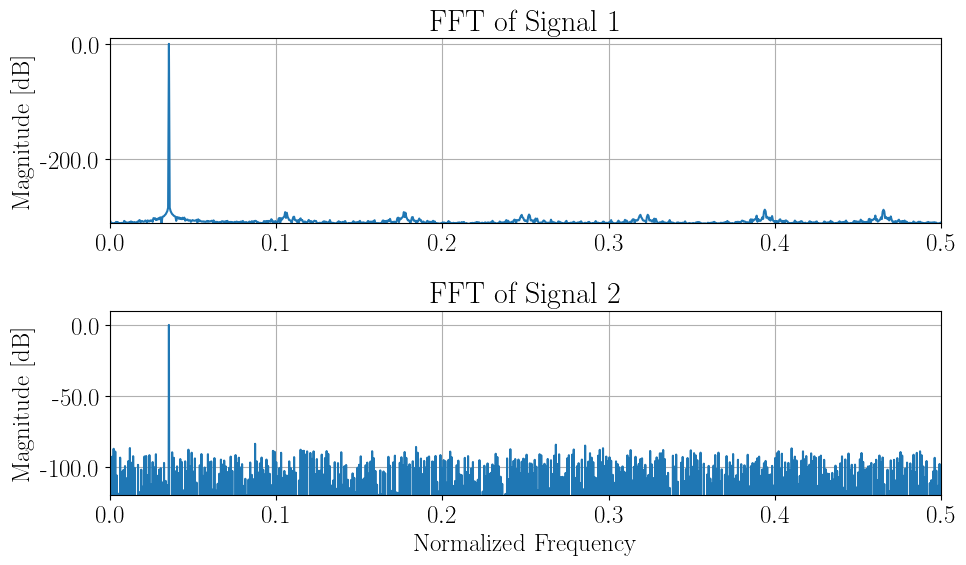

In [3]:
N = 2*1024
M = 3
OSR = 8

x = 2**(M-1) * np.sin(2*np.pi*np.floor(2/7 * N/OSR) * np.arange(N)/N)
xfxp = [Fxp(val, signed=True, n_word=12, n_frac=8, overflow='saturate', rounding='around') for val in x]

xfxp_ = np.array([val() for val in xfxp])
print(type(xfxp_))

funcs.plot_fft_dB(x, xfxp_, ylim1=(-310, 10), ylim2=(-120, 10))

### Delta sigma modulation

In [6]:
yfxp = funcs.deltaSigma(xfxp, n_word=4, n_frac=0)

print(np.max(yfxp), np.min(yfxp))

w = signal.blackman(len(yfxp), False)
yfxp *= w

7.0 -7.0


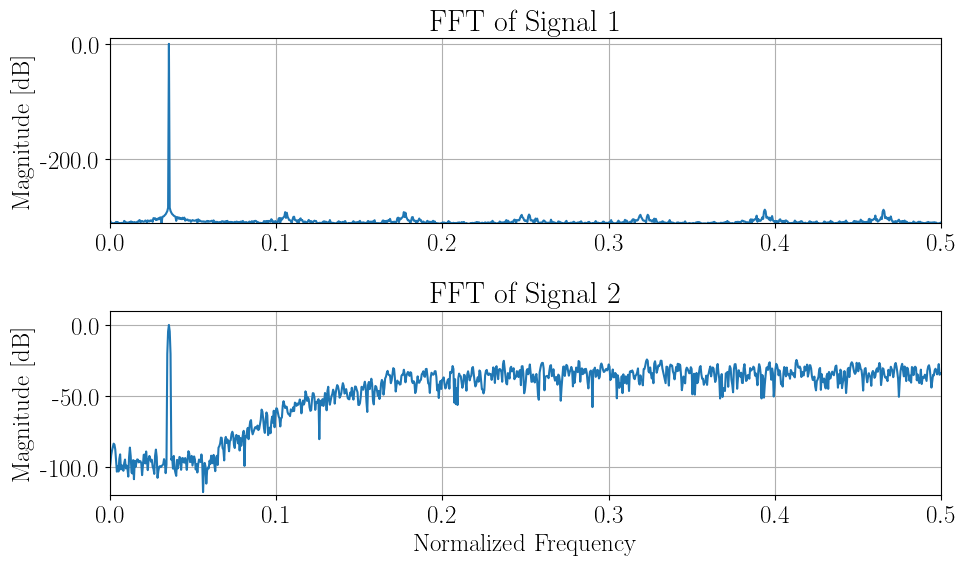

In [5]:
funcs.plot_fft_dB(x, yfxp, ylim1=(-310, 10), ylim2=(-120, 10))